# Task 1-Prediction using Supervised ML
### By Pratyush Bhatnagar
### Intern at TSF GRIP For March'2021

#### Predict the percentage of an student based on the no. of study hours.

In [2]:
# Importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from the dataset
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)
print("Data imported successfully")

ds.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


To get the relation between hours of studies vs the scores, plot the distribution using Matpoltlib library.

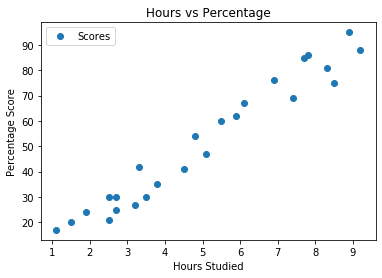

In [4]:
# Plotting the distribution of scores
ds.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

This shows a Linear relationship between the hours studied and the scores.

In [5]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Preparation

In [6]:
X = ds.iloc[:, :-1].values   #independent variable, attributes
y = ds.iloc[:, 1].values   #dependent variable, labels

### Splitting Data

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Training

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print('Coeff:', regressor.coef_)  #The coefficient value represents the mean change in the response given a one unit change in the predictor.
print('Intercept:', regressor.intercept_)  #The intercept (often labeled the constant) is the expected mean value of Y when all X=0.

Coeff: [9.91065648]
Intercept: 2.018160041434683


Plotting the regression line obtained

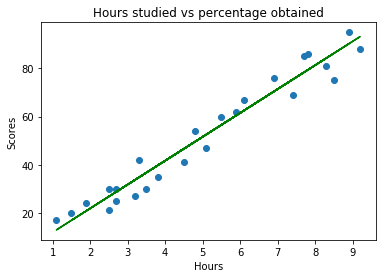

In [11]:
line = regressor.coef_*X + regressor.intercept_  #y=mx+c


plt.xlabel('Hours')  
plt.ylabel('Scores')  

plt.title("Hours studied vs percentage obtained") 
plt.scatter(X,y)
plt.plot(X, line, color="green");
plt.show()

### Making Predictions and Comparing with the actual values.

In [12]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


### Testing our own data

In [14]:
hours = 9.25
my_pred = regressor.predict(np.array([hours]).reshape(1,1))
print("Number of hours : {}".format(hours))
print("Predicted Score: {}".format(my_pred[0]))

Number of hours : 9.25
Predicted Score: 93.69173248737538


### Evaluating our Model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
print('Mean Squared Error (MSE) : %.2f'
      % mean_squared_error(y_test, y_pred))
print('R^2 : %.2f'
      % r2_score(y_test, y_pred))
print('Mean Absolute Error : %.2f'
      % mean_absolute_error(y_test, y_pred))

Mean Squared Error (MSE) : 21.60
R^2 : 0.95
Mean Absolute Error : 4.18
